In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LogNorm, Normalize
import seaborn as sb
from scipy.stats import binned_statistic

In [2]:
import mplhep as hep
plt.style.use(hep.style.ROOT)
hep.style.use(hep.style.CMS)

In [3]:
#infile = uproot.open('/eos/cms/store/group/cmst3/group/l1tr/kypark/BESTPUPPI/PFStudies/TT_PU200/FP/AR2025_MLPUPPI_genRatio/perfNano_10224470_0.root')

#infile = uproot.open('/eos/cms/store/cmst3/group/l1tr/kypark/BESTPUPPI/PFStudies/TT_PU200/FP/AR2025_MLPUPPI_genRatioSum/perfNano_10271068_85.root')

#infile = uproot.open('/eos/cms/store/cmst3/group/l1tr/kypark/BESTPUPPI/PFStudies/TT_PU200/FP/AR2025_MLPUPPI_genRatioSum_finalState/perfNano_10274077_1.root')

### Final state
#infile = uproot.open('/eos/cms/store/cmst3/group/l1tr/kypark/BESTPUPPI/PFStudies/TT_PU200/FP/perfNano_PU200.root')

infile = uproot.open('/eos/cms/store/cmst3/group/l1tr/kypark/BESTPUPPI/PFStudies/TT_PU200/FP/perfNano_PU0.root')


In [4]:
events = infile['Events;1']
branches = events.keys()

In [5]:
branches

['run',
 'luminosityBlock',
 'event',
 'bunchCrossing',
 'orbitNumber',
 'nTkEleL2',
 'TkEleL2_charge',
 'TkEleL2_hwQual',
 'TkEleL2_caloEta',
 'TkEleL2_caloPhi',
 'TkEleL2_eta',
 'TkEleL2_idScore',
 'TkEleL2_pfIso',
 'TkEleL2_pfIsoPV',
 'TkEleL2_phi',
 'TkEleL2_pt',
 'TkEleL2_puppiIso',
 'TkEleL2_puppiIsoPV',
 'TkEleL2_tkEta',
 'TkEleL2_tkIso',
 'TkEleL2_tkIsoPV',
 'TkEleL2_tkPhi',
 'TkEleL2_tkPt',
 'TkEleL2_vz',
 'nTkEmL2',
 'TkEmL2_hwQual',
 'TkEmL2_eta',
 'TkEmL2_pfIso',
 'TkEmL2_pfIsoPV',
 'TkEmL2_phi',
 'TkEmL2_pt',
 'TkEmL2_puppiIso',
 'TkEmL2_puppiIsoPV',
 'TkEmL2_tkIso',
 'TkEmL2_tkIsoPV',
 'nDecEmCaloBarrel',
 'DecEmCaloBarrel_hwEta',
 'DecEmCaloBarrel_hwPhi',
 'DecEmCaloBarrel_hwQual',
 'DecEmCaloBarrel_eta',
 'DecEmCaloBarrel_phi',
 'DecEmCaloBarrel_pt',
 'nDecEmCaloHGCalNoTK',
 'DecEmCaloHGCalNoTK_hwEta',
 'DecEmCaloHGCalNoTK_hwPhi',
 'DecEmCaloHGCalNoTK_hwQual',
 'DecEmCaloHGCalNoTK_eta',
 'DecEmCaloHGCalNoTK_phi',
 'DecEmCaloHGCalNoTK_pt',
 'nDecEmCaloHGCal',
 'DecEmCalo

In [6]:
#typ = 'PF'
typ = 'Puppi'

In [7]:
dR = '0p2'

In [8]:
mask_neutral = np.abs(events[f'L1{typ}Cands_pdgId'].array()) == 130

mask_eta = np.abs(events[f'L1{typ}Cands_eta'].array()) < 1.4

mask_genMatched = events[f'L1{typ}Cands_isGenMatched'].array() == 1

mask_neutral = mask_neutral & mask_eta
mask_neutral_matched = mask_neutral & mask_eta & mask_genMatched
mask_neutral_nonMatched = mask_neutral & mask_eta & ~mask_genMatched

#mask_neutral_genMatched = mask_neutral & mask_genMatched

## Multiplicities

In [9]:
color_key = ['blue', 'green', 'red']

bins = range(10)

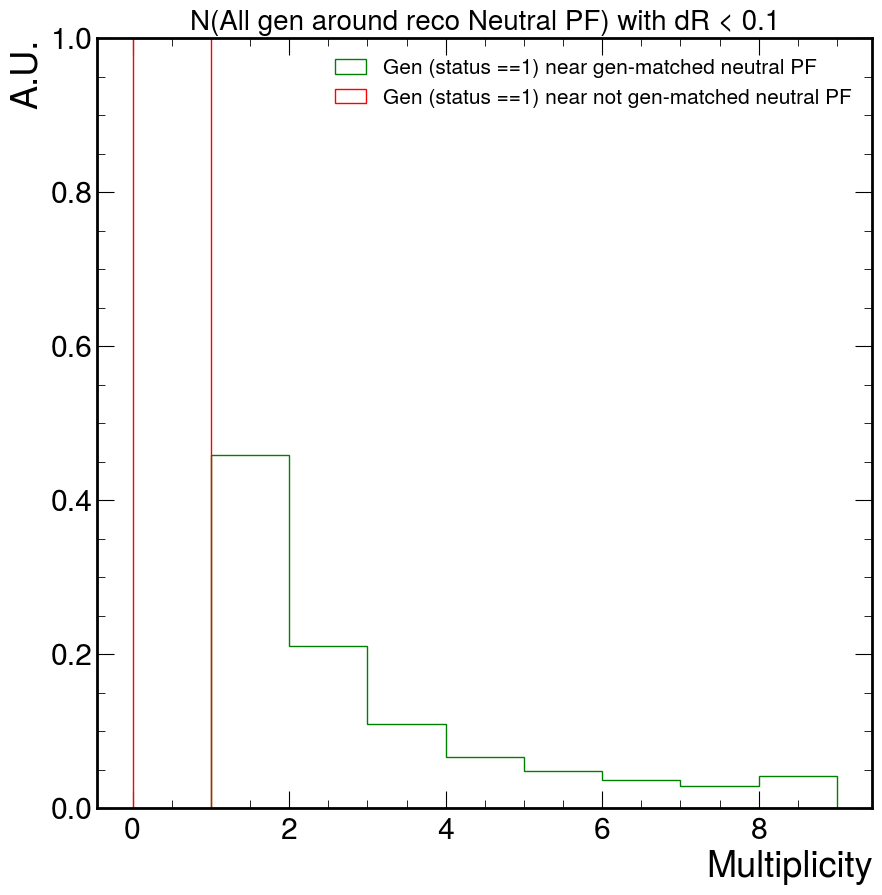

In [10]:
cut = 'nGen'

dR = '0p1'

branches_num = [b for b in branches if ("Gen" in b) and ((f"L1{typ}Cands" in b) and (dR in b)) and (cut in b) and ('Status1In' in b)]

map_key = {
    f'{cut}Status1InCone{dR}': 'status ==1',
}

line_key = {
    f'{cut}Status1InCone{dR}': '-',
}

for idx, br in enumerate(branches_num):
    #plt.hist(ak.flatten(events[br].array()[mask_neutral]), bins = bins, label=f'Gen ({map_key[br.split('_')[-1]]}) near all neutral PF', histtype='step', linestyle=line_key[br.split('_')[-1]], color=color_key[idx], density=True)
    plt.hist(ak.flatten(events[br].array()[mask_neutral_matched]), bins = bins, label=f'Gen ({map_key[br.split('_')[-1]]}) near gen-matched neutral PF', histtype='step', linestyle=line_key[br.split('_')[-1]], color=color_key[idx+1], density=True)
    plt.hist(ak.flatten(events[br].array()[mask_neutral_nonMatched]), bins = bins, label=f'Gen ({map_key[br.split('_')[-1]]}) near not gen-matched neutral PF', histtype='step', linestyle=line_key[br.split('_')[-1]], color=color_key[idx+2], density=True)

plt.xlabel("Multiplicity")
plt.ylabel('A.U.')
plt.ylim([0,1])
plt.title(f'N(All gen around reco Neutral PF) with dR < {dR.replace("p",".")}', fontsize=20)
plt.legend(fontsize=15)

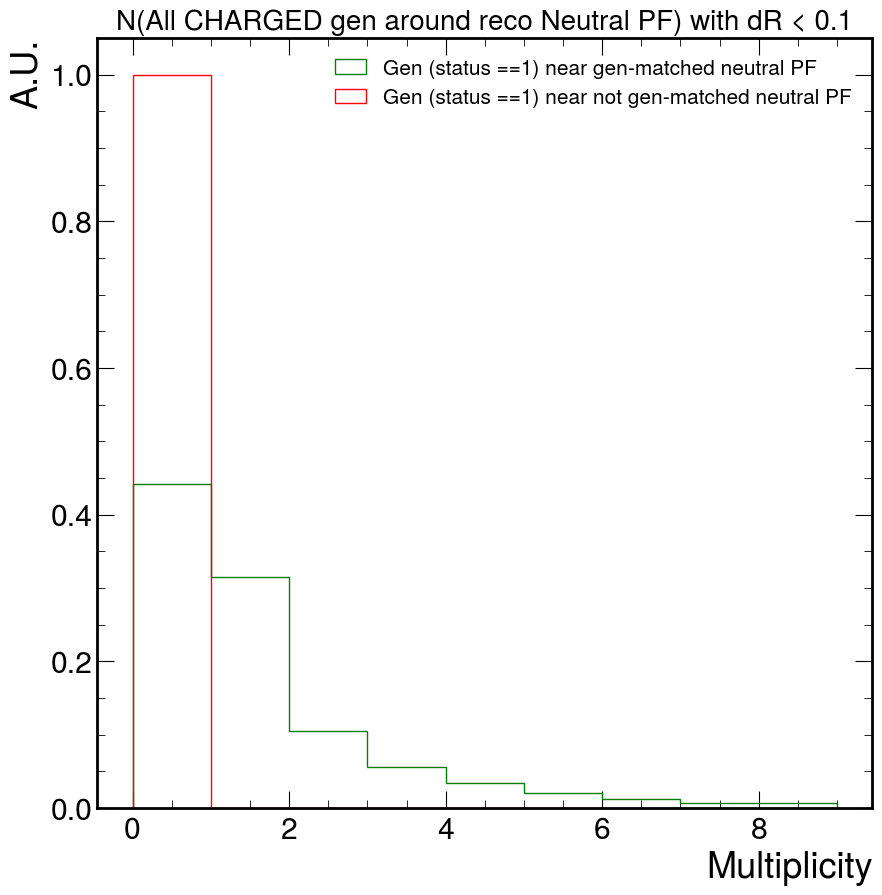

In [11]:
cut = 'nChargedGen'

dR = '0p1'

branches_num = [b for b in branches if ("Gen" in b) and ((f"L1{typ}Cands" in b) and (dR in b)) and (cut in b) and ('Status1In' in b)]

map_key = {
    f'{cut}Status1InCone{dR}': 'status ==1',
}

line_key = {
    f'{cut}Status1InCone{dR}': '-',
}

for idx, br in enumerate(branches_num):
    #plt.hist(ak.flatten(events[br].array()[mask_neutral]), bins = bins, label=f'Gen ({map_key[br.split('_')[-1]]}) near all neutral PF', histtype='step', linestyle=line_key[br.split('_')[-1]], color=color_key[idx], density=True)
    plt.hist(ak.flatten(events[br].array()[mask_neutral_matched]), bins = bins, label=f'Gen ({map_key[br.split('_')[-1]]}) near gen-matched neutral PF', histtype='step', linestyle=line_key[br.split('_')[-1]], color=color_key[idx+1], density=True)
    plt.hist(ak.flatten(events[br].array()[mask_neutral_nonMatched]), bins = bins, label=f'Gen ({map_key[br.split('_')[-1]]}) near not gen-matched neutral PF', histtype='step', linestyle=line_key[br.split('_')[-1]], color=color_key[idx+2], density=True)

plt.xlabel("Multiplicity")
plt.ylabel('A.U.')
plt.title(f'N(All CHARGED gen around reco Neutral PF) with dR < {dR.replace("p",".")}', fontsize=20)
plt.legend(fontsize=15)

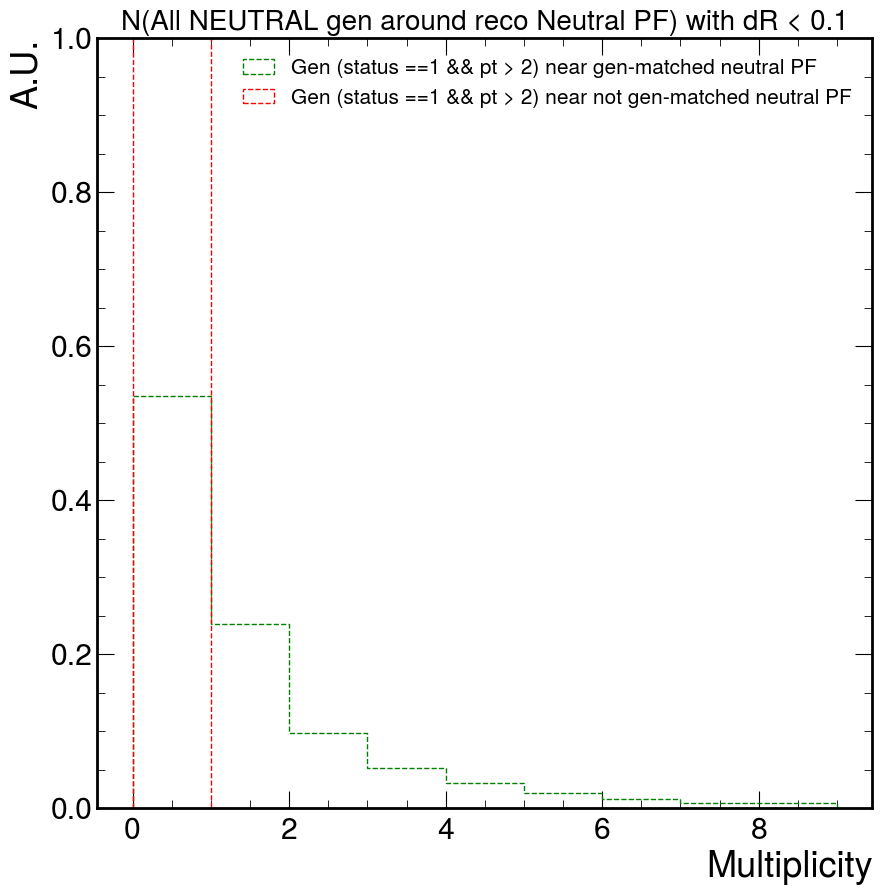

In [12]:
cut = 'nNeutralGen'

dR = '0p1'

branches_num = [b for b in branches if ("Gen" in b) and ((f"L1{typ}Cands" in b) and (dR in b)) and (cut in b) and ('Status1Pt2In' in b)]

map_key = {
    f'{cut}Status1InCone{dR}': 'status ==1',
    f'{cut}Status1Pt2InCone{dR}': 'status ==1 && pt > 2',

}

line_key = {
    f'{cut}Status1InCone{dR}': '-',
    f'{cut}Status1Pt2InCone{dR}': '--',

}

for idx, br in enumerate(branches_num):
    #plt.hist(ak.flatten(events[br].array()[mask_neutral]), bins = bins, label=f'Gen ({map_key[br.split('_')[-1]]}) near all neutral PF', histtype='step', linestyle=line_key[br.split('_')[-1]], color=color_key[idx], density=True)
    plt.hist(ak.flatten(events[br].array()[mask_neutral_matched]), bins = bins, label=f'Gen ({map_key[br.split('_')[-1]]}) near gen-matched neutral PF', histtype='step', linestyle=line_key[br.split('_')[-1]], color=color_key[idx+1], density=True)
    plt.hist(ak.flatten(events[br].array()[mask_neutral_nonMatched]), bins = bins, label=f'Gen ({map_key[br.split('_')[-1]]}) near not gen-matched neutral PF', histtype='step', linestyle=line_key[br.split('_')[-1]], color=color_key[idx+2], density=True)

plt.xlabel("Multiplicity")
plt.ylabel('A.U.')
plt.ylim([0,1])
plt.title(f'N(All NEUTRAL gen around reco Neutral PF) with dR < {dR.replace("p",".")}', fontsize=20)
plt.legend(fontsize=15)

In [13]:
"""
cut = 'nGen'

for idx, dR in enumerate(['0p1','0p2','0p3']):
    branches_num = [b for b in branches if ("Gen" in b) and ((f"L1{typ}Cands" in b) and (dR in b)) and (cut in b) and ('Status1In' in b)]

    map_key = {
        f'{cut}Status1InCone{dR}': 'status ==1',
        f'{cut}Status1Pt2InCone{dR}': 'status ==1 && pT > 2'
    }

    line_key = {
        f'{cut}Status1InCone{dR}': '-',
        f'{cut}Status1Pt2InCone{dR}': '--'
    }

    for br in branches_num:
        plt.hist(ak.flatten(events[br].array()[mask_neutral]), bins = bins, label=f'dR < {dR.replace("p",".")}: {map_key[br.split('_')[-1]]}', histtype='step', linestyle=line_key[br.split('_')[-1]], color=color_key[idx], density=True)
        plt.hist(ak.flatten(events[br].array()[mask_neutral]), bins = bins, label=f'dR < {dR.replace("p",".")}: {map_key[br.split('_')[-1]]}', histtype='step', linestyle=line_key[br.split('_')[-1]], color=color_key[idx], density=True)
    
plt.ylabel('A.U.')
plt.title(f'# All gen around reco Neutral PF')
plt.legend()
"""

'\ncut = \'nGen\'\n\nfor idx, dR in enumerate([\'0p1\',\'0p2\',\'0p3\']):\n    branches_num = [b for b in branches if ("Gen" in b) and ((f"L1{typ}Cands" in b) and (dR in b)) and (cut in b) and (\'Status1In\' in b)]\n\n    map_key = {\n        f\'{cut}Status1InCone{dR}\': \'status ==1\',\n        f\'{cut}Status1Pt2InCone{dR}\': \'status ==1 && pT > 2\'\n    }\n\n    line_key = {\n        f\'{cut}Status1InCone{dR}\': \'-\',\n        f\'{cut}Status1Pt2InCone{dR}\': \'--\'\n    }\n\n    for br in branches_num:\n        plt.hist(ak.flatten(events[br].array()[mask_neutral]), bins = bins, label=f\'dR < {dR.replace("p",".")}: {map_key[br.split(\'_\')[-1]]}\', histtype=\'step\', linestyle=line_key[br.split(\'_\')[-1]], color=color_key[idx], density=True)\n        plt.hist(ak.flatten(events[br].array()[mask_neutral]), bins = bins, label=f\'dR < {dR.replace("p",".")}: {map_key[br.split(\'_\')[-1]]}\', histtype=\'step\', linestyle=line_key[br.split(\'_\')[-1]], color=color_key[idx], density=True)\

In [14]:
"""
cut = 'nChargedGen'

for idx, dR in enumerate(['0p1','0p2','0p3']):
    branches_num = [b for b in branches if ("Gen" in b) and ((f"L1{typ}Cands" in b) and (dR in b)) and (cut in b) and ('Status1' in b)]

    map_key = {
        f'{cut}Status1InCone{dR}': 'status ==1',
        f'{cut}Status1Pt2InCone{dR}': 'status ==1 && pT > 2'
    }

    line_key = {
        f'{cut}Status1InCone{dR}': '-',
        f'{cut}Status1Pt2InCone{dR}': '--'
    }

    for br in branches_num:
        plt.hist(ak.flatten(events[br].array()[mask_neutral]), bins = bins, label=f'dR < {dR.replace("p",".")}: {map_key[br.split('_')[-1]]}', histtype='step', linestyle=line_key[br.split('_')[-1]], color=color_key[idx], density=True)
    
plt.ylabel('A.U.')
plt.title(f'# All Charged gen (charge != 0) around reco Neutral PF')
plt.legend()
"""

'\ncut = \'nChargedGen\'\n\nfor idx, dR in enumerate([\'0p1\',\'0p2\',\'0p3\']):\n    branches_num = [b for b in branches if ("Gen" in b) and ((f"L1{typ}Cands" in b) and (dR in b)) and (cut in b) and (\'Status1\' in b)]\n\n    map_key = {\n        f\'{cut}Status1InCone{dR}\': \'status ==1\',\n        f\'{cut}Status1Pt2InCone{dR}\': \'status ==1 && pT > 2\'\n    }\n\n    line_key = {\n        f\'{cut}Status1InCone{dR}\': \'-\',\n        f\'{cut}Status1Pt2InCone{dR}\': \'--\'\n    }\n\n    for br in branches_num:\n        plt.hist(ak.flatten(events[br].array()[mask_neutral]), bins = bins, label=f\'dR < {dR.replace("p",".")}: {map_key[br.split(\'_\')[-1]]}\', histtype=\'step\', linestyle=line_key[br.split(\'_\')[-1]], color=color_key[idx], density=True)\n    \nplt.ylabel(\'A.U.\')\nplt.title(f\'# All Charged gen (charge != 0) around reco Neutral PF\')\nplt.legend()\n'

In [16]:
"""
cut = 'nNeutralGen'

for idx, dR in enumerate(['0p1','0p2','0p3']):
    branches_num = [b for b in branches if ("Gen" in b) and ((f"L1{typ}Cands" in b) and (dR in b)) and (cut in b) and ('Status1' in b)]

    map_key = {
        f'{cut}Status1InCone{dR}': 'status ==1',
        f'{cut}Status1Pt2InCone{dR}': 'status ==1 && pT > 2'
    }

    line_key = {
        f'{cut}Status1InCone{dR}': '-',
        f'{cut}Status1Pt2InCone{dR}': '--'
    }

    for br in branches_num:
        plt.hist(ak.flatten(events[br].array()[mask_neutral]), bins = bins, label=f'dR < {dR.replace("p",".")}: {map_key[br.split('_')[-1]]}', histtype='step', linestyle=line_key[br.split('_')[-1]], color=color_key[idx], density=True)
    
plt.ylabel('A.U.')
plt.title(f'# All Neutral gen (charge == 0) around reco Neutral PF')
plt.legend()
"""

'\ncut = \'nNeutralGen\'\n\nfor idx, dR in enumerate([\'0p1\',\'0p2\',\'0p3\']):\n    branches_num = [b for b in branches if ("Gen" in b) and ((f"L1{typ}Cands" in b) and (dR in b)) and (cut in b) and (\'Status1\' in b)]\n\n    map_key = {\n        f\'{cut}Status1InCone{dR}\': \'status ==1\',\n        f\'{cut}Status1Pt2InCone{dR}\': \'status ==1 && pT > 2\'\n    }\n\n    line_key = {\n        f\'{cut}Status1InCone{dR}\': \'-\',\n        f\'{cut}Status1Pt2InCone{dR}\': \'--\'\n    }\n\n    for br in branches_num:\n        plt.hist(ak.flatten(events[br].array()[mask_neutral]), bins = bins, label=f\'dR < {dR.replace("p",".")}: {map_key[br.split(\'_\')[-1]]}\', histtype=\'step\', linestyle=line_key[br.split(\'_\')[-1]], color=color_key[idx], density=True)\n    \nplt.ylabel(\'A.U.\')\nplt.title(f\'# All Neutral gen (charge == 0) around reco Neutral PF\')\nplt.legend()\n'

## Reco sum

In [17]:
dR = '0p2'

In [18]:
branches_num = [b for b in branches if ("gen" in b) and ((f"L1{typ}Cands" in b) and (dR in b))]
branches_num

['L1PuppiCands_genPtSum0p2',
 'L1PuppiCands_genNeutralPtSum0p2',
 'L1PuppiCands_genChargedPtSum0p2',
 'L1PuppiCands_genChargedHadPtSum0p2',
 'L1PuppiCands_genNeutralHadPtSum0p2',
 'L1PuppiCands_genRecoRatio0p2']

In [19]:
branches_denom = [b for b in branches if ("reco" in b) and ((f"L1{typ}Cands" in b) and (dR in b))]
branches_denom

['L1PuppiCands_recoPtSum0p2',
 'L1PuppiCands_recoNeutralPtSum0p2',
 'L1PuppiCands_recoChargedPtSum0p2',
 'L1PuppiCands_recoChargedHadPtSum0p2',
 'L1PuppiCands_recoNeutralHadPtSum0p2']

In [20]:
#reco_pt = events['L1PuppiCands_pt'].array() * events['L1PuppiCands_puppiWeight'].array()

reco_pt = events[f'L1{typ}Cands_pt'].array()

In [21]:
numerator = {}

for br in branches_num:
    numerator[br] = events[br].array()

In [22]:
denominator = {}

for br in branches_denom:
    denominator[br] = events[br].array()

In [23]:
"""
bins = np.linspace(0, 2, 100)

denom = reco_pt[mask_neutral_matched]

for br in branches_num:
    plt.hist(ak.flatten(numerator[br][mask_neutral_matched]/denom), bins = bins, label=br, histtype='step', density=True)

plt.title('Denom: reco pt')
plt.legend()
"""

"\nbins = np.linspace(0, 2, 100)\n\ndenom = reco_pt[mask_neutral_matched]\n\nfor br in branches_num:\n    plt.hist(ak.flatten(numerator[br][mask_neutral_matched]/denom), bins = bins, label=br, histtype='step', density=True)\n\nplt.title('Denom: reco pt')\nplt.legend()\n"

In [24]:
"""
bins = np.linspace(0, 2, 100)

for idx in denominator.keys():
    denom = denominator[idx][mask_neutral] + reco_pt[mask_neutral]

    for br in branches_num:
        plt.hist(ak.flatten(numerator[br][mask_neutral]/denom), bins = bins, label=br, histtype='step', density=True)

    plt.title(f'Denom: {idx}')
    plt.legend()
    
    plt.show()
"""

"\nbins = np.linspace(0, 2, 100)\n\nfor idx in denominator.keys():\n    denom = denominator[idx][mask_neutral] + reco_pt[mask_neutral]\n\n    for br in branches_num:\n        plt.hist(ak.flatten(numerator[br][mask_neutral]/denom), bins = bins, label=br, histtype='step', density=True)\n\n    plt.title(f'Denom: {idx}')\n    plt.legend()\n    \n    plt.show()\n"

In [25]:
"""
#bins = np.linspace(0, 2, 100)
bins = np.linspace(0, 1, 100)

for idx in denominator.keys():
    denom = denominator[idx][mask_neutral_matched]

    for br in branches_num:
        if 'genNeutralPt' not in br:
            continue
        if 'Had' in idx:
            continue
        plt.hist(ak.flatten(ak.where(numerator[br][mask_neutral_matched]/denom > 1, 1, numerator[br][mask_neutral_matched]/denom)), bins = bins, label=f'Gen ratio w/ Denom: {idx.split('_')[-1].split('0')[0]}', histtype='step', density=True)
        #plt.hist(ak.flatten(numerator[br][mask_neutral_matched]/denom), bins = bins, label=f'Gen ratio w/ Denom: {idx.split('_')[-1].split('0')[0]}', histtype='step', density=True)
plt.hist(ak.flatten(events[f'L1{typ}Cands_puppiWeight'].array()[mask_neutral_matched]), bins = bins, label=f'PUPPI weight', histtype='step', density=True)

plt.yscale('log')
plt.ylabel('A.U.')
plt.xlabel('Ratio of gen-sum to reco-sum')

plt.title(f'Numerator: all NEUTRAL gens in cone')
plt.legend()   
plt.show()
"""

"\n#bins = np.linspace(0, 2, 100)\nbins = np.linspace(0, 1, 100)\n\nfor idx in denominator.keys():\n    denom = denominator[idx][mask_neutral_matched]\n\n    for br in branches_num:\n        if 'genNeutralPt' not in br:\n            continue\n        if 'Had' in idx:\n            continue\n        plt.hist(ak.flatten(ak.where(numerator[br][mask_neutral_matched]/denom > 1, 1, numerator[br][mask_neutral_matched]/denom)), bins = bins, label=f'Gen ratio w/ Denom: {idx.split('_')[-1].split('0')[0]}', histtype='step', density=True)\n        #plt.hist(ak.flatten(numerator[br][mask_neutral_matched]/denom), bins = bins, label=f'Gen ratio w/ Denom: {idx.split('_')[-1].split('0')[0]}', histtype='step', density=True)\nplt.hist(ak.flatten(events[f'L1{typ}Cands_puppiWeight'].array()[mask_neutral_matched]), bins = bins, label=f'PUPPI weight', histtype='step', density=True)\n\nplt.yscale('log')\nplt.ylabel('A.U.')\nplt.xlabel('Ratio of gen-sum to reco-sum')\n\nplt.title(f'Numerator: all NEUTRAL gens i

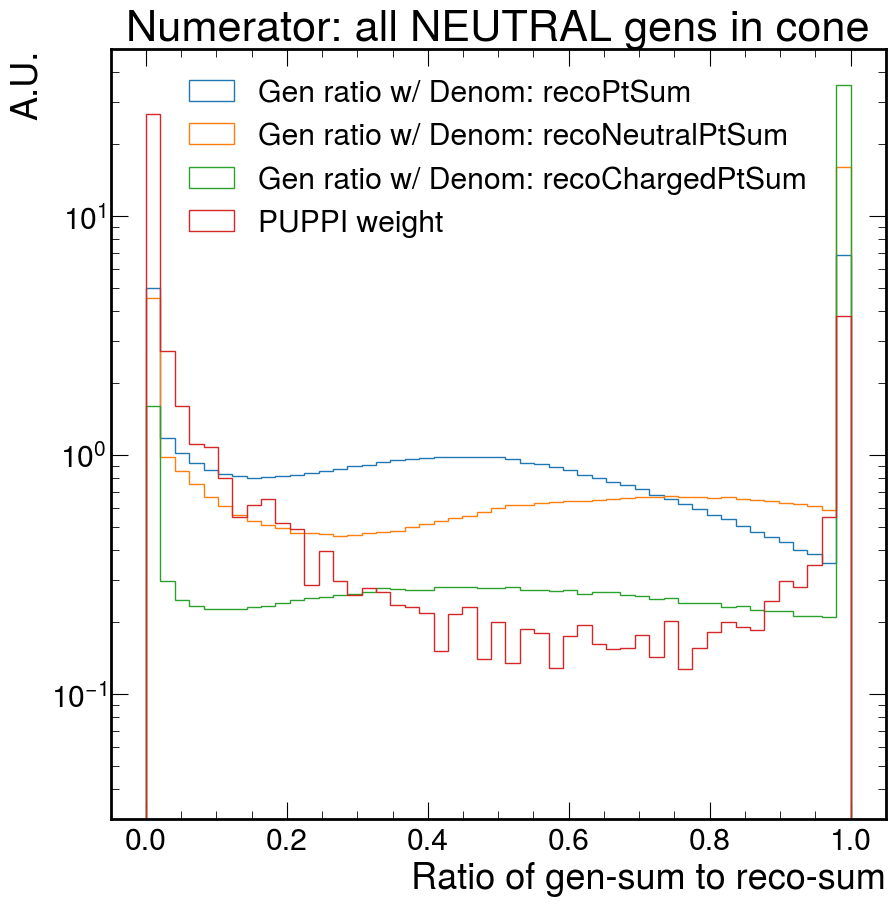

In [35]:
#bins = np.linspace(0, 2, 100)
bins = np.linspace(0, 1, 50)

for idx in denominator.keys():
    denom = denominator[idx][mask_neutral_matched]

    for br in branches_num:
        if 'genNeutralPt' not in br:
            continue
        if 'Had' in idx:
            continue
        
        plt.hist(ak.flatten(ak.where(numerator[br][mask_neutral_matched]/denom > 1, 1, numerator[br][mask_neutral_matched]/denom)), bins = bins, label=f'Gen ratio w/ Denom: {idx.split('_')[-1].split('0')[0]}', histtype='step', density=True)
        #plt.hist(ak.flatten(numerator[br][mask_neutral_matched]/denom), bins = bins, label=f'Gen ratio w/ Denom: {idx.split('_')[-1].split('0')[0]}', histtype='step', density=True)
plt.hist(ak.flatten(events[f'L1{typ}Cands_puppiWeight'].array()[mask_neutral_matched]), bins = bins, label=f'PUPPI weight', histtype='step', density=True)

plt.yscale('log')
plt.ylabel('A.U.')
plt.xlabel('Ratio of gen-sum to reco-sum')

plt.ylim([3e-2, 5e+1])

plt.title(f'Numerator: all NEUTRAL gens in cone')
plt.legend()   
plt.show()

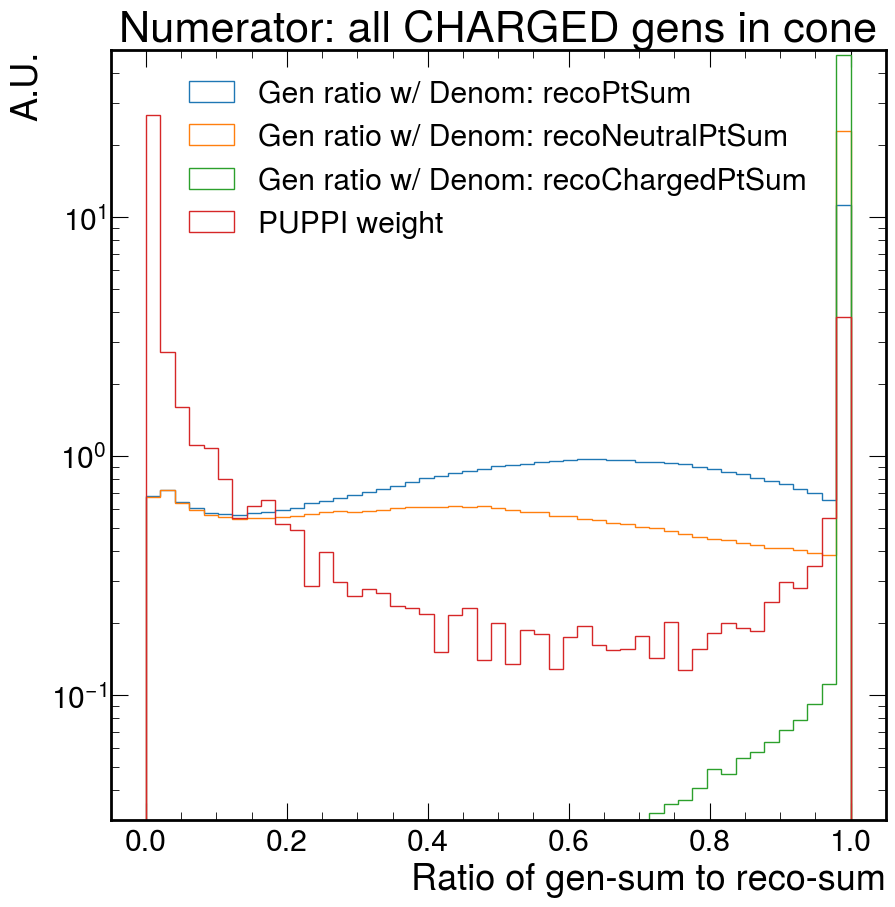

In [36]:
#bins = np.linspace(0, 2, 100)
bins = np.linspace(0, 1, 50)

for idx in denominator.keys():
    denom = denominator[idx][mask_neutral_matched]

    for br in branches_num:
        if 'genChargedPt' not in br:
            continue
        if 'Had' in idx:
            continue
        
        plt.hist(ak.flatten(ak.where(numerator[br][mask_neutral_matched]/denom > 1, 1, numerator[br][mask_neutral_matched]/denom)), bins = bins, label=f'Gen ratio w/ Denom: {idx.split('_')[-1].split('0')[0]}', histtype='step', density=True)
        #plt.hist(ak.flatten(numerator[br][mask_neutral_matched]/denom), bins = bins, label=f'Gen ratio w/ Denom: {idx.split('_')[-1].split('0')[0]}', histtype='step', density=True)
plt.hist(ak.flatten(events[f'L1{typ}Cands_puppiWeight'].array()[mask_neutral_matched]), bins = bins, label=f'PUPPI weight', histtype='step', density=True)

plt.yscale('log')
plt.ylabel('A.U.')
plt.xlabel('Ratio of gen-sum to reco-sum')
plt.ylim([3e-2, 5e+1])

plt.title(f'Numerator: all CHARGED gens in cone')
plt.legend()   
plt.show()

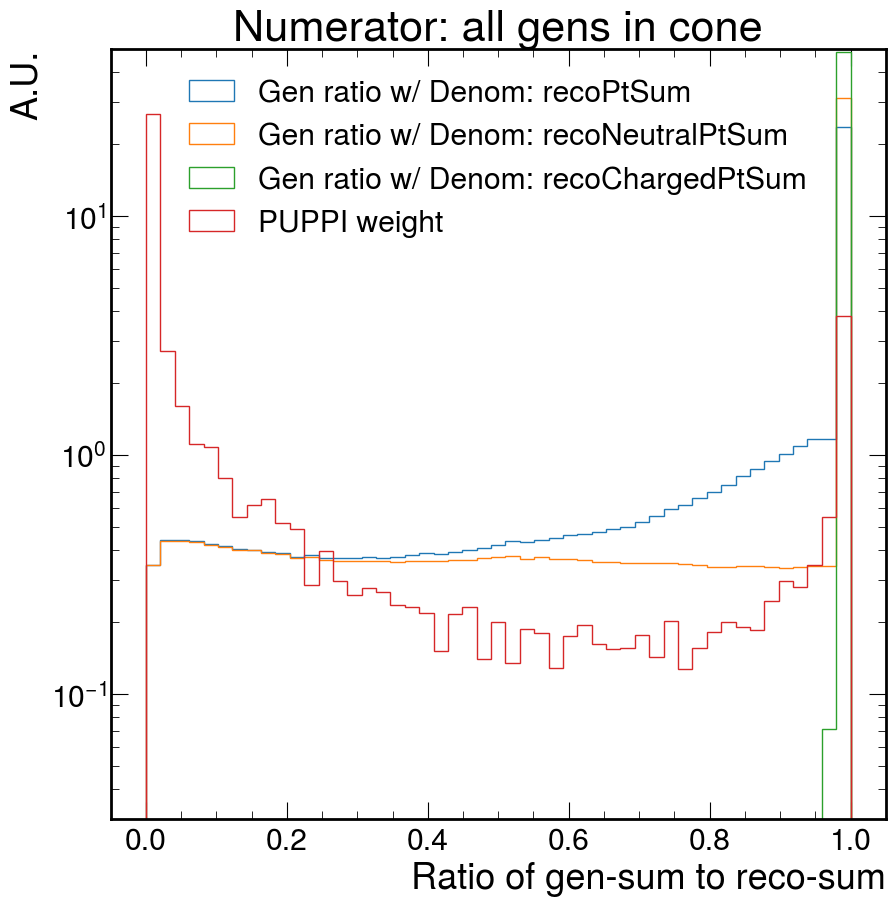

In [37]:
#bins = np.linspace(0, 2, 100)
bins = np.linspace(0, 1, 50)

for idx in denominator.keys():
    denom = denominator[idx][mask_neutral_matched]

    for br in branches_num:
        if 'genPt' not in br:
            continue
        if 'Had' in idx:
            continue
        
        plt.hist(ak.flatten(ak.where(numerator[br][mask_neutral_matched]/denom > 1, 1, numerator[br][mask_neutral_matched]/denom)), bins = bins, label=f'Gen ratio w/ Denom: {idx.split('_')[-1].split('0')[0]}', histtype='step', density=True)
        #plt.hist(ak.flatten(numerator[br][mask_neutral_matched]/denom), bins = bins, label=f'Gen ratio w/ Denom: {idx.split('_')[-1].split('0')[0]}', histtype='step', density=True)
plt.hist(ak.flatten(events[f'L1{typ}Cands_puppiWeight'].array()[mask_neutral_matched]), bins = bins, label=f'PUPPI weight', histtype='step', density=True)

plt.yscale('log')
plt.ylabel('A.U.')
plt.xlabel('Ratio of gen-sum to reco-sum')
plt.ylim([3e-2, 5e+1])

plt.title(f'Numerator: all gens in cone')
plt.legend()   
plt.show()

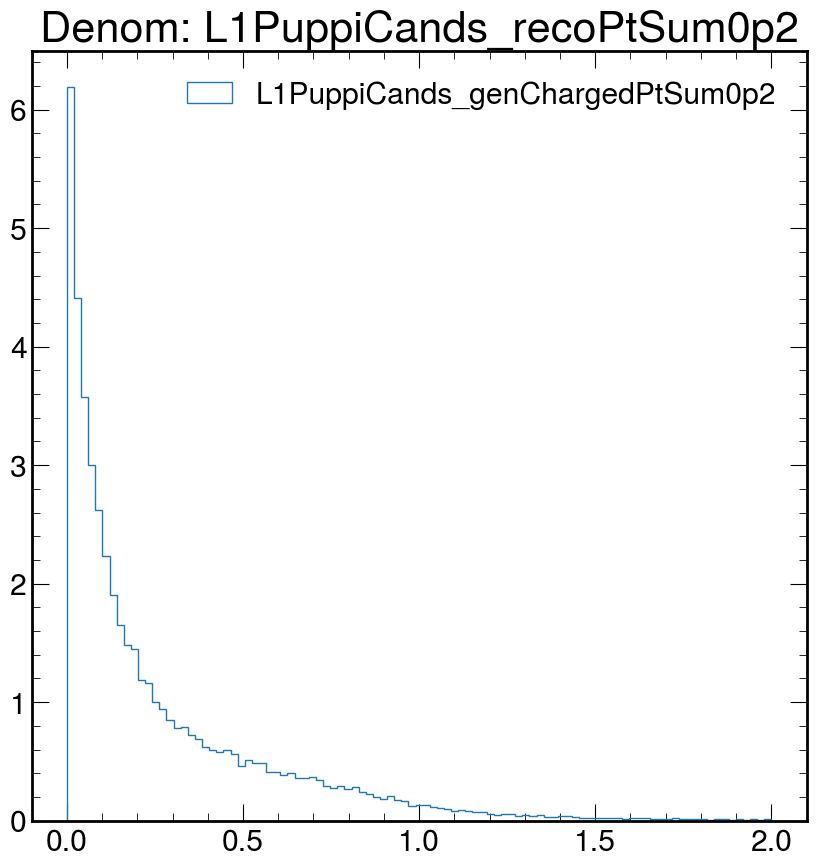

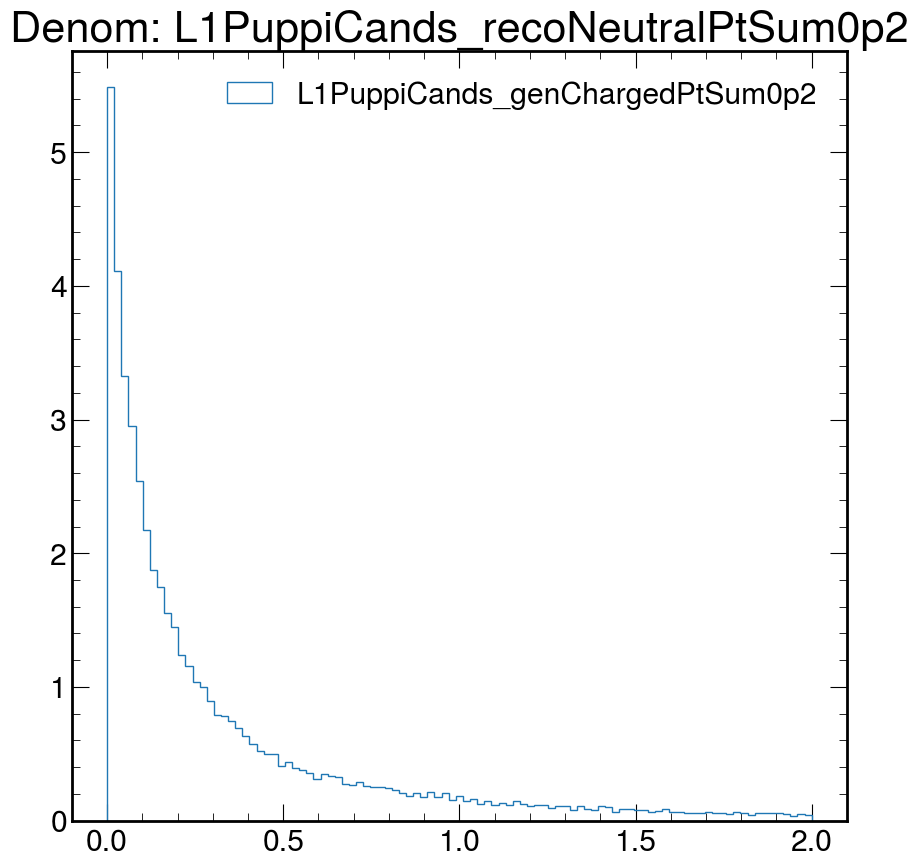

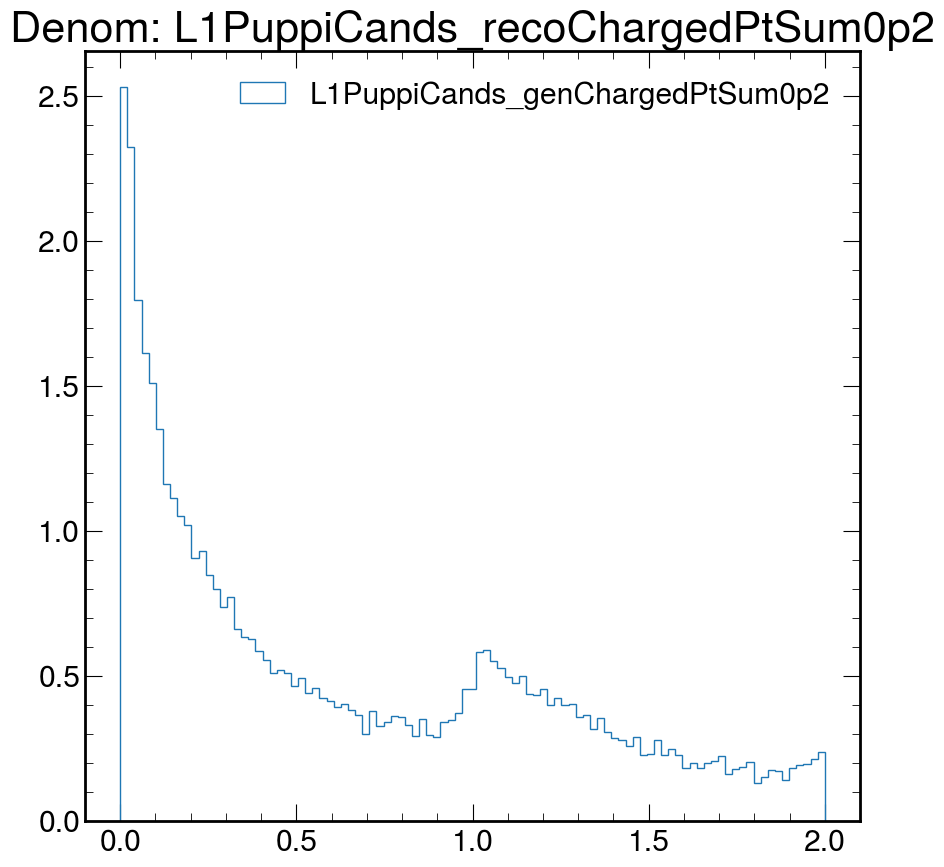

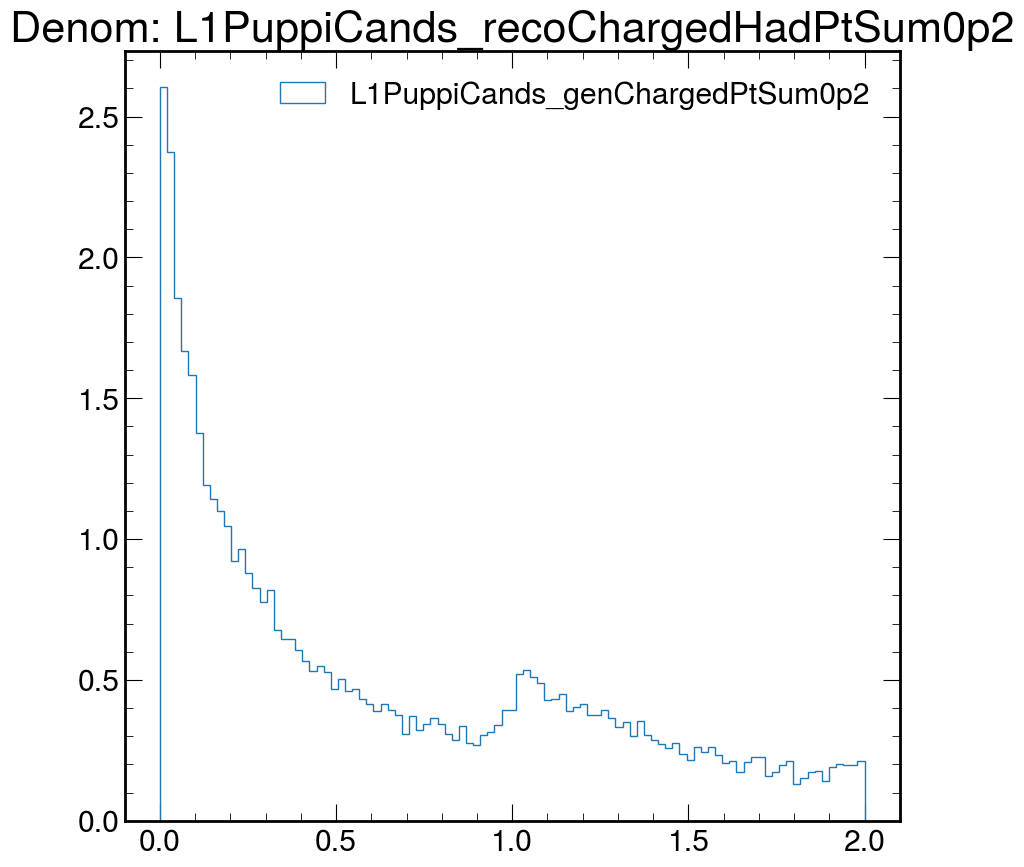

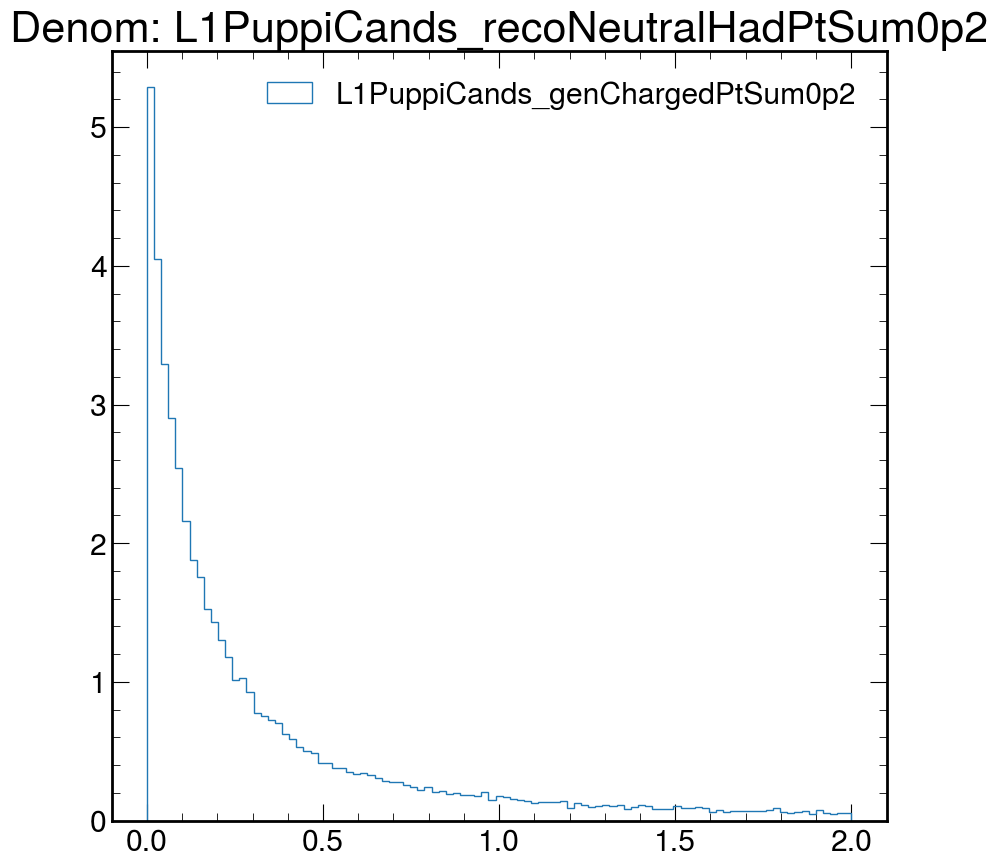

In [168]:
bins = np.linspace(0, 2, 100)

for idx in denominator.keys():
    denom = denominator[idx][mask_neutral_matched]

    for br in branches_num:
        if 'genChargedPt' not in br:
            continue
        plt.hist(ak.flatten(numerator[br][mask_neutral_matched]/denom), bins = bins, label=br, histtype='step', density=True)
        
    plt.title(f'Denom: {idx}')
    plt.legend()
    
    plt.show()

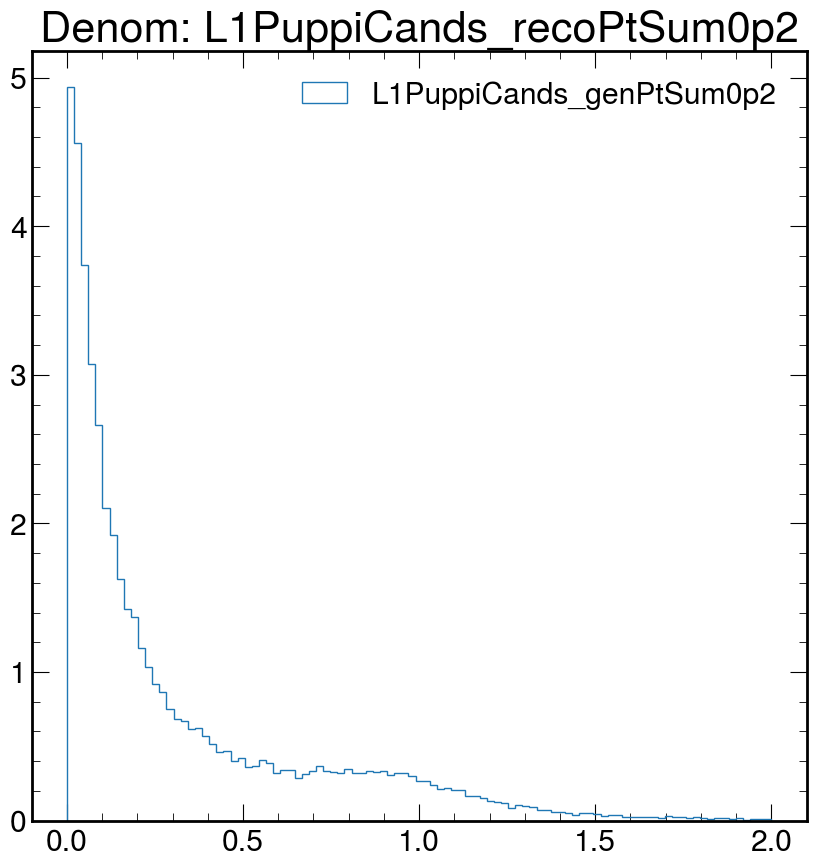

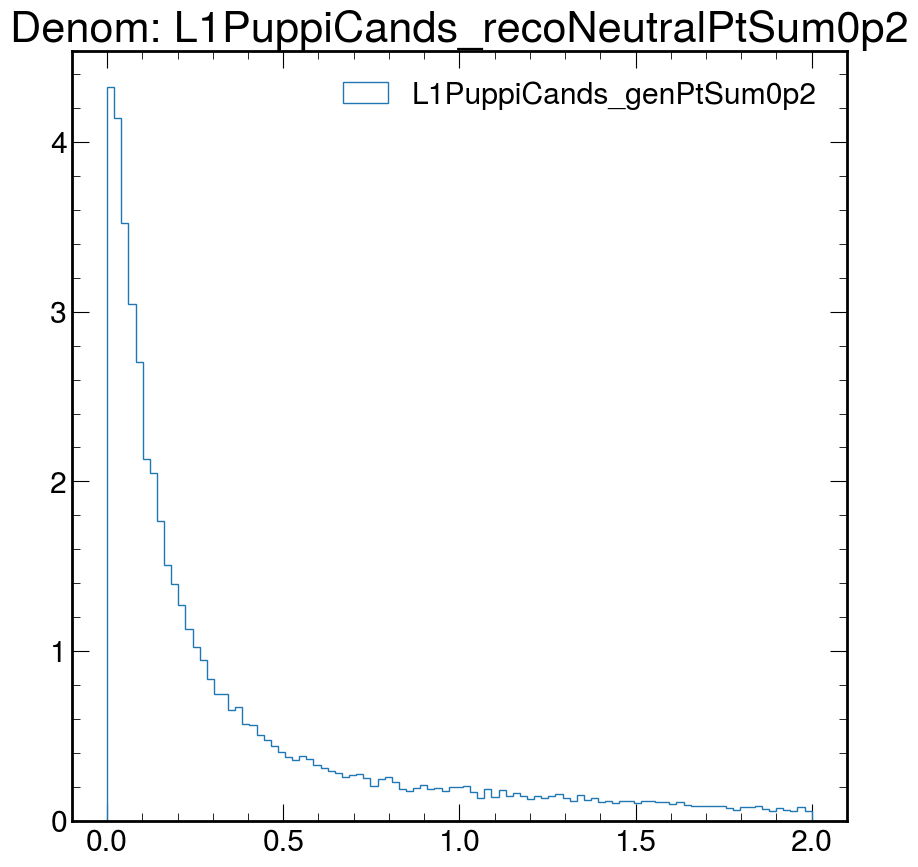

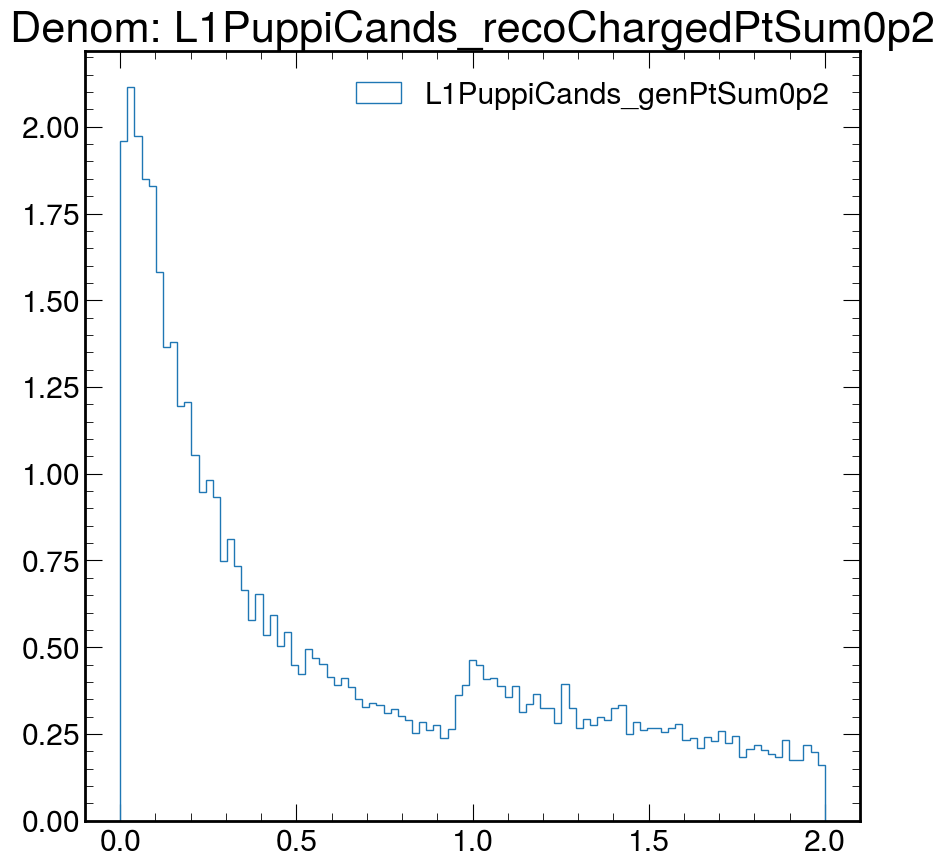

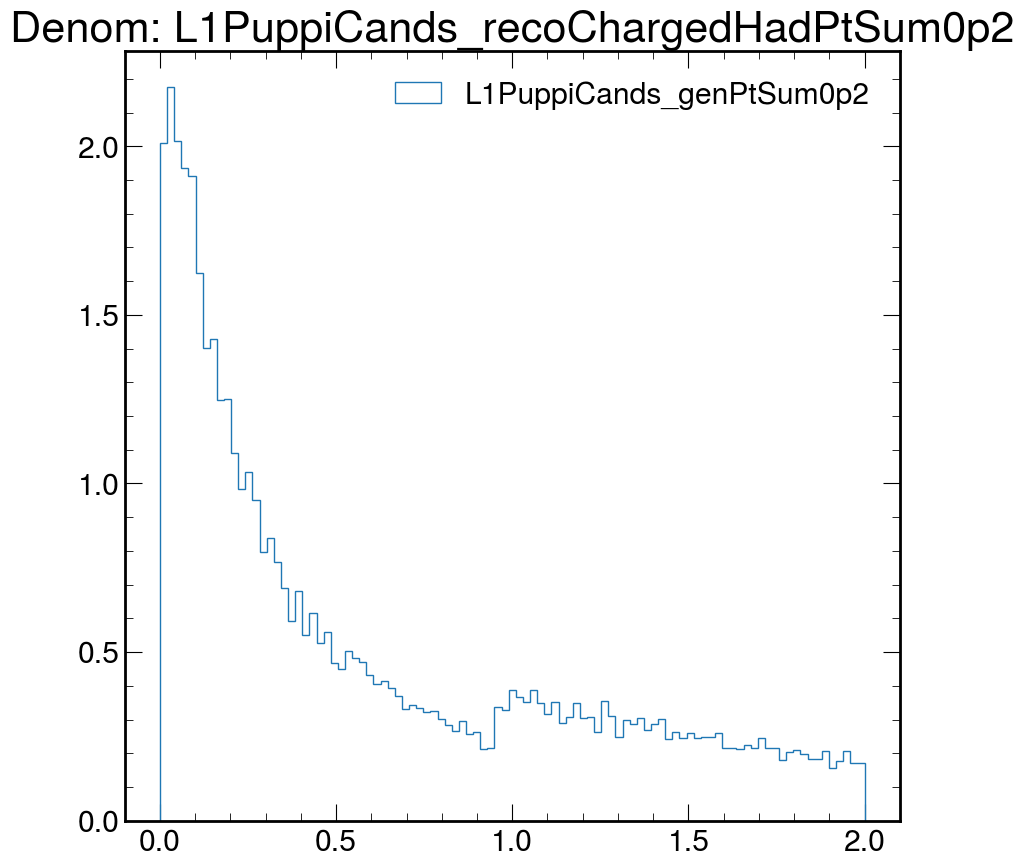

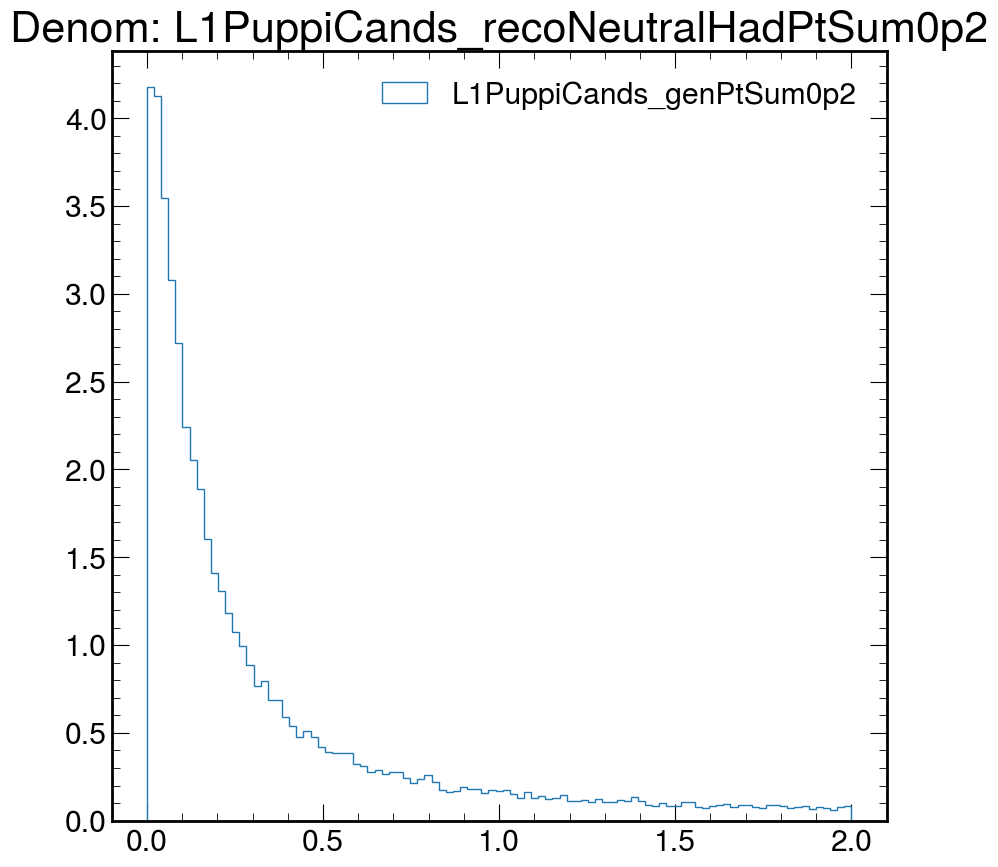

In [167]:
bins = np.linspace(0, 2, 100)

for idx in denominator.keys():
    denom = denominator[idx][mask_neutral_matched]

    for br in branches_num:
        if 'genPt' not in br:
            continue
        plt.hist(ak.flatten(numerator[br][mask_neutral_matched]/denom), bins = bins, label=br, histtype='step', density=True)
        
    plt.title(f'Denom: {idx}')
    plt.legend()
    
    plt.show()